In [1]:
# Project - Binary classification to predict if the client will subscribe a bank term deposit 
#           + Select the right customers for a telemarketing campaign.

# Business background - The Telemarketing Team of a Bank runs campaigns to expand the term deposit portfolio. We are requested to 
# enable prioritization for the Telemarketing team, so that overall responses and ROI of the campaign increases.

# ROI will increase in 2 ways:-
# • Reduction of investment by not calling up everyone
# • Increase in rate of response among the prioritized customer list

# Entire data response rate - x %
# Prioritized list response rate - a %
# Expectation from the model-> a > x

# The list (and priority order) of customers to be contacted is prepared with the help of ML.

In [2]:
# In this problem statement, recall is the important metric, as we dont want to miss out any individual who may go for a Term Deposit

In [3]:
# Data Source
# This project is based on "Bank Marketing" UCI dataset
# The full description along with dataset is available here at http://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Importing Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import mean

from sklearn.feature_selection import VarianceThreshold # Feature selector that removes all low-variance features.
from sklearn.preprocessing import KBinsDiscretizer # feature discretization for bivariate analysis 
from sklearn.feature_selection import SelectKBest, chi2

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import tree # for plotting Decision Tree

from sklearn import metrics
from sklearn.metrics import confusion_matrix

from IPython.display import display_html 

# Importing the Data for ML Project

In [5]:
df = pd.read_csv('E:\Learning\LearnBay\Stats_ML\Projects\Aritro_Sir\Telemarketing_campaign_Term_Deposit_AritraSir\\bank-additional-full.csv')
df.shape

(41188, 21)

In [6]:
pd.set_option('display.max_columns', None) # Setting Display options to see entire features

In [7]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Exploratory Data Analysis

In [8]:
df['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [9]:
df['campaign'].value_counts() #number of contacts performed during this campaign

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

In [10]:
df['poutcome'].value_counts() #outcome of previous marketing campaign

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [11]:
df['nr.employed'].value_counts()  #??

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [12]:
df['pdays'].value_counts().sort_index()

0         15
1         26
2         61
3        439
4        118
5         46
6        412
7         60
8         18
9         64
10        52
11        28
12        58
13        36
14        20
15        24
16        11
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    39673
Name: pdays, dtype: int64

In [13]:
df['duration'].value_counts().sort_index()

0        4
1        3
2        1
3        3
4       12
        ..
3631     1
3643     1
3785     1
4199     1
4918     1
Name: duration, Length: 1544, dtype: int64

In [14]:
# The euribor3m (Euro Interbank Offered Rate) is the interest rate at which a selection of European banks lend one another
# funds denominated in euros whereby the loans have a maturity of 3 months. 
# not sure how this varies for each observation
df['euribor3m'].value_counts().sort_index()

0.634      8
0.635     43
0.636     14
0.637      6
0.638      7
        ... 
4.967    643
4.968    992
4.970    172
5.000      7
5.045      9
Name: euribor3m, Length: 316, dtype: int64

### Warning Suppression 

In [15]:
import warnings
warnings.filterwarnings('ignore')

# Label the Target feature to 1/0

In [16]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [17]:
df['y'].value_counts(normalize=True) # Event rate is 11%

# Out of the all the observations, 11% has taken the term deposit

no     0.887346
yes    0.112654
Name: y, dtype: float64

In [18]:
df['y'] = np.where(df['y']=="yes",1,0) #changing 'yes' or 'no' to 1 or 0

# Defining Target and Independent Features

In [19]:
Y = df[['y']]

X = df.drop(['y'],axis=1)

# Split features into Numerical and Categorical

In [20]:
X.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [21]:
num=X.select_dtypes(include="number")
char=X.select_dtypes(include="object")

In [22]:
num.dtypes

age                 int64
duration            int64
campaign            int64
pdays               int64
previous            int64
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
dtype: object

In [23]:
num.shape

(41188, 10)

In [24]:
char.dtypes

job            object
marital        object
education      object
default        object
housing        object
loan           object
contact        object
month          object
day_of_week    object
poutcome       object
dtype: object

In [25]:
num.age.value_counts()

31    1947
32    1846
33    1833
36    1780
35    1759
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

In [26]:
def unique_levels(x):
    x = x.value_counts().count()
    return(x)

df_value_counts=pd.DataFrame(num.apply(lambda x : unique_levels(x)))
df_value_counts.columns=['feature_levels']
df_value_counts

,feature_levels
age,78
duration,1544
campaign,42
pdays,27
previous,8
emp.var.rate,10
cons.price.idx,26
cons.conf.idx,26
euribor3m,316
nr.employed,11


In [27]:
num_var_less_levels = df_value_counts.loc[df_value_counts['feature_levels']<=20]
num_var_less_levels

,feature_levels
previous,8
emp.var.rate,10
nr.employed,11


In [28]:
num_var_less_levels.index

Index(['previous', 'emp.var.rate', 'nr.employed'], dtype='object')

In [29]:
num.loc[:,num_var_less_levels.index].head()

,previous,emp.var.rate,nr.employed
0,0,1.1,5191.0
1,0,1.1,5191.0
2,0,1.1,5191.0
3,0,1.1,5191.0
4,0,1.1,5191.0


In [30]:
# making columns with feature_levels<=20 as categorical columns
char=pd.concat([char,num.loc[:,num_var_less_levels.index]],axis=1,join="inner")
char.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,previous,emp.var.rate,nr.employed
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,0,1.1,5191.0
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,0,1.1,5191.0
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,0,1.1,5191.0


In [31]:
char.shape

(41188, 13)

In [32]:
df_value_counts['feature_levels']>20

age                True
duration           True
campaign           True
pdays              True
previous          False
emp.var.rate      False
cons.price.idx     True
cons.conf.idx      True
euribor3m          True
nr.employed       False
Name: feature_levels, dtype: bool

In [33]:
num = num.loc[:,df_value_counts['feature_levels']>20]
num.head(4)

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
0,56,261,1,999,93.994,-36.4,4.857
1,57,149,1,999,93.994,-36.4,4.857
2,37,226,1,999,93.994,-36.4,4.857
3,40,151,1,999,93.994,-36.4,4.857


# Outlier Analysis of Numerical Features

In [34]:
num.describe(percentiles=[0.01,0.05,0.10,0.25,0.50,0.75,0.85,0.9,0.99])

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,93.575664,-40.502600,3.621291
std,10.42125,259.279249,2.770014,186.910907,0.578840,4.628198,1.734447
min,17.00000,0.000000,1.000000,0.000000,92.201000,-50.800000,0.634000
1%,23.00000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658480
5%,26.00000,36.000000,1.000000,999.000000,92.713000,-47.100000,0.797000
10%,28.00000,59.000000,1.000000,999.000000,92.893000,-46.200000,1.046000
25%,32.00000,102.000000,1.000000,999.000000,93.075000,-42.700000,1.344000
50%,38.00000,180.000000,2.000000,999.000000,93.749000,-41.800000,4.857000
75%,47.00000,319.000000,3.000000,999.000000,93.994000,-36.400000,4.961000


In [35]:
num[num.age>71].shape # 1% ie; 369 observations between 71 and 98

(369, 7)

In [36]:
num[num.age>=98]

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
38452,98,476,1,2,92.431,-26.9,0.73
38455,98,272,2,999,92.431,-26.9,0.73


# Capping and Flooring of outliers

In [37]:
# x.clip() assigns values outside boundary to boundary values.
def outlier_cap(x):
    x=x.clip(lower=x.quantile(0.01))  
    x=x.clip(upper=x.quantile(0.99))
    return(x)

In [38]:
num=num.apply(lambda x : outlier_cap(x)) # x denotes each columns as series objects

In [39]:
num.describe(percentiles=[0.01,0.05,0.1,0.25,0.50,0.9,0.99])

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,39.976644,254.379784,2.500024,962.479290,93.574052,-40.495137,3.621394
std,10.138262,235.184174,2.301191,186.891194,0.576030,4.612905,1.734194
min,23.000000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658480
1%,23.000000,11.000000,1.000000,3.000000,92.201000,-49.500000,0.658932
5%,26.000000,36.000000,1.000000,999.000000,92.713000,-47.100000,0.797000
10%,28.000000,59.000000,1.000000,999.000000,92.893000,-46.200000,1.046000
25%,32.000000,102.000000,1.000000,999.000000,93.075000,-42.700000,1.344000
50%,38.000000,180.000000,2.000000,999.000000,93.749000,-41.800000,4.857000
90%,55.000000,551.000000,5.000000,999.000000,94.465000,-36.100000,4.964000


# Missing Value Analysis

In [40]:
num.isnull().any() # no missing values

age               False
duration          False
campaign          False
pdays             False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
dtype: bool

In [41]:
# Since the data does not contain any missing values Imputation Processes are not required
# In case of missing values in the data, columns or features that have more than 25% of rows as missing can be removed
# X = X.loc[:, X.isnull().mean() <= .25]

# Feature Selection - Numerical Features 

## Part 1 : Remove Features with 0 Variance

In [42]:
varselector= VarianceThreshold(threshold=0) # Features with a variance lower than this threshold will be removed. 
varselector.fit_transform(num)
num=num.iloc[:,varselector.get_support(indices=True)] # varselector.get_support to get the features selected
num.head() 

# no features are removed, as all features has a variance greater than the threshold

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
0,56.0,261.0,1.0,999.0,93.994,-36.4,4.857
1,57.0,149.0,1.0,999.0,93.994,-36.4,4.857
2,37.0,226.0,1.0,999.0,93.994,-36.4,4.857
3,40.0,151.0,1.0,999.0,93.994,-36.4,4.857
4,56.0,307.0,1.0,999.0,93.994,-36.4,4.857


## Part 2 - Bivariate Analysis - Feature Discretization

In [43]:
# Feature discretization decomposes each feature into a set of bins

In [44]:
num.head()

,age,duration,campaign,pdays,cons.price.idx,cons.conf.idx,euribor3m
0,56.0,261.0,1.0,999.0,93.994,-36.4,4.857
1,57.0,149.0,1.0,999.0,93.994,-36.4,4.857
2,37.0,226.0,1.0,999.0,93.994,-36.4,4.857
3,40.0,151.0,1.0,999.0,93.994,-36.4,4.857
4,56.0,307.0,1.0,999.0,93.994,-36.4,4.857


In [45]:
# encode parameter to return the bin identifier encoded as an integer value.
# strategy parameter (uniform/quantile etc) - strategy used to define the widths of the bins.
# uniform - All bins in each feature have identical widths.
# quantile - All bins in each feature have the same number of points.
# KBinsDiscretizer to bin continuous data into intervals.

discrete= KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform') 

In [46]:
num_binned=pd.DataFrame(discrete.fit_transform(num),index=num.index, columns=num.columns).add_suffix('_Rank')

In [47]:
num_binned.head()

,age_Rank,duration_Rank,campaign_Rank,pdays_Rank,cons.price.idx_Rank,cons.conf.idx_Rank,euribor3m_Rank
0,6.0,1.0,0.0,9.0,7.0,5.0,9.0
1,7.0,1.0,0.0,9.0,7.0,5.0,9.0
2,2.0,1.0,0.0,9.0,7.0,5.0,9.0
3,3.0,1.0,0.0,9.0,7.0,5.0,9.0
4,6.0,2.0,0.0,9.0,7.0,5.0,9.0


In [48]:
num_binned.head() # without capping and flooring

,age_Rank,duration_Rank,campaign_Rank,pdays_Rank,cons.price.idx_Rank,cons.conf.idx_Rank,euribor3m_Rank
0,6.0,1.0,0.0,9.0,7.0,5.0,9.0
1,7.0,1.0,0.0,9.0,7.0,5.0,9.0
2,2.0,1.0,0.0,9.0,7.0,5.0,9.0
3,3.0,1.0,0.0,9.0,7.0,5.0,9.0
4,6.0,2.0,0.0,9.0,7.0,5.0,9.0


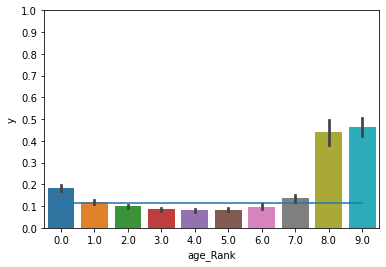

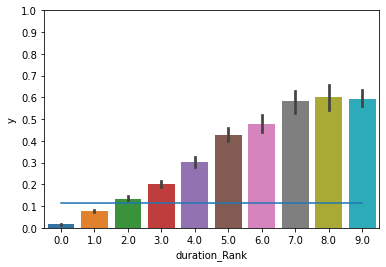

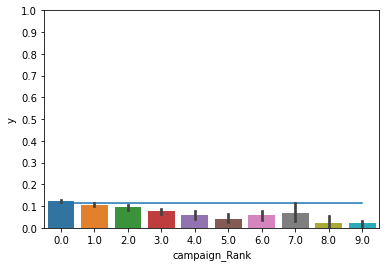

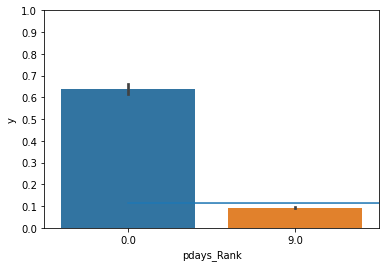

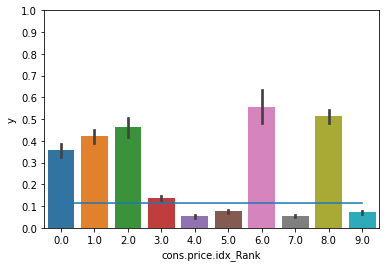

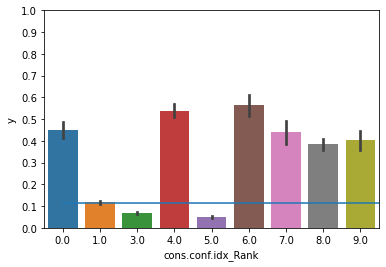

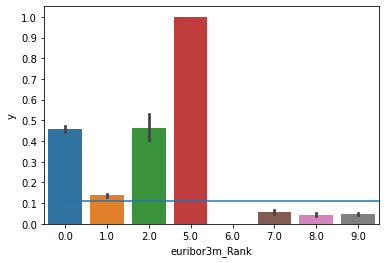

In [49]:
# if some deciles are below the population average and some higher than population average, then it is indicative of the
# feature's ability to discriminate the event from non event, making it a good predictor

X_bin_combined = pd.concat([Y,num_binned],axis=1,join='inner')

for col in (num_binned.columns):
    plt.figure()
    sns.lineplot(x=col,y=X_bin_combined['y'].mean(),data=X_bin_combined)
    sns.barplot(x=col, y="y",data=X_bin_combined, estimator=mean)
    plt.yticks(np.arange(0,1.1,0.1))
plt.show()

### Findings from Feature Discretization

In [50]:
# campaign column can be dropped

# duration is a very good parameter - as there is a clear slope in the graph - but, the duration is not known before a call is performed. 
# So dropping this variable to have a realistic predictive model.

In [51]:
df[df.pdays<999].shape[0], df[df.pdays==999].shape[0]

(1515, 39673)

In [52]:
# event rate for pdays<999 and pdays=999
df[df.pdays<999].y.mean(), df[df.pdays==999].y.mean()

(0.6382838283828383, 0.09258185667834548)

In [53]:
# 1515 observations with pdays<999 has an event rate of 63.8%
# 39673 observations with pdays=999 has an event rate of 0.09%
# so pdays can be a categorical variable

In [54]:
char['pdays=999'] = num['pdays'].apply(lambda x : 1 if x==999 else 0)
select_features_df_num = num.drop(['campaign','pdays','duration'],axis=1)

In [55]:
select_features_df_num.head(3)

,age,cons.price.idx,cons.conf.idx,euribor3m
0,56.0,93.994,-36.4,4.857
1,57.0,93.994,-36.4,4.857
2,37.0,93.994,-36.4,4.857


In [56]:
select_features_df_num.shape

(41188, 4)

# Feature Selection - Categorical Features 

## Part 1 - Missing Value Analysis

In [57]:
char.isnull().any() # no missing values

job             False
marital         False
education       False
default         False
housing         False
loan            False
contact         False
month           False
day_of_week     False
poutcome        False
previous        False
emp.var.rate    False
nr.employed     False
pdays=999       False
dtype: bool

## Part 2 - Bivariate Analysis

In [58]:
char.shape

(41188, 14)

In [59]:
char.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'previous', 'emp.var.rate',
       'nr.employed', 'pdays=999'],
      dtype='object')

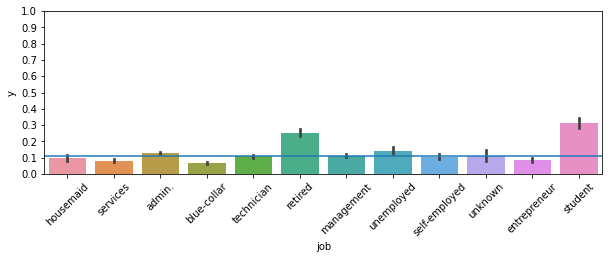

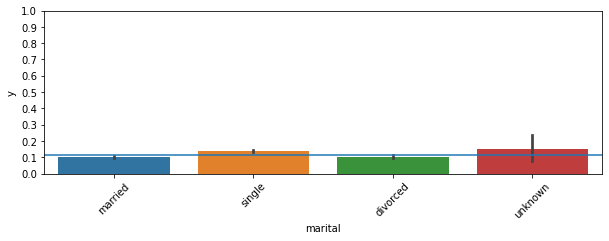

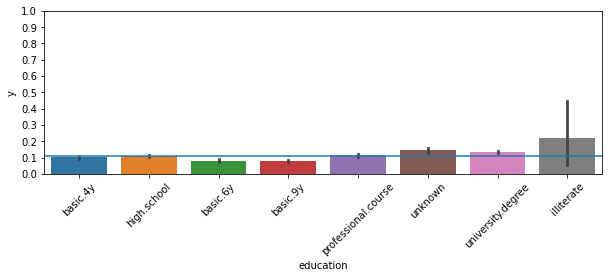

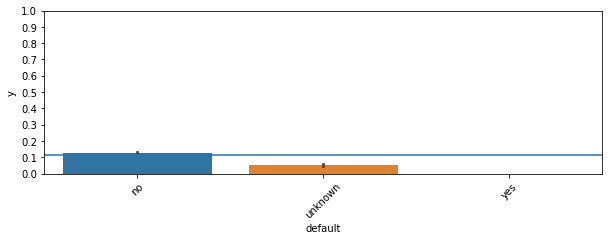

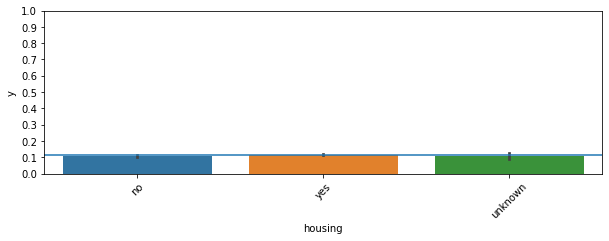

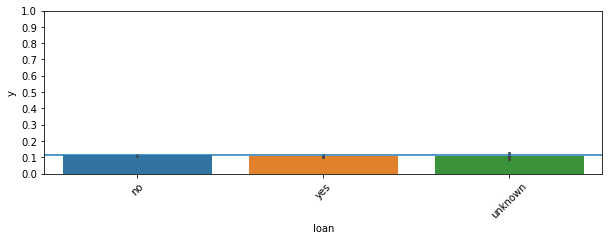

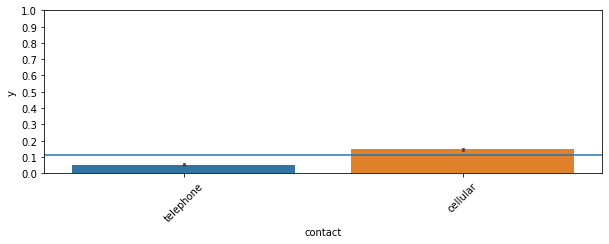

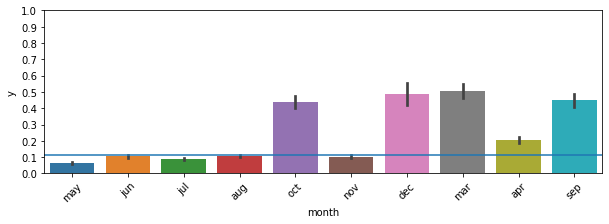

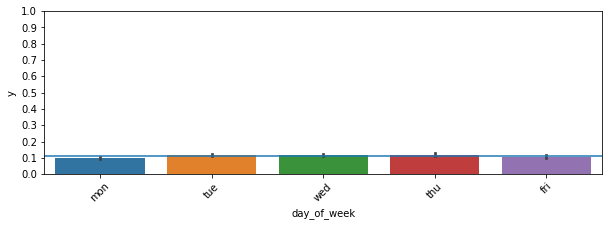

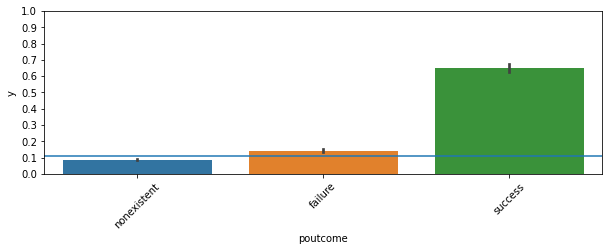

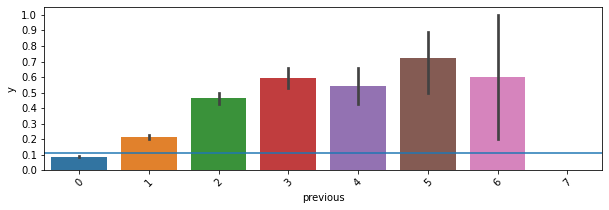

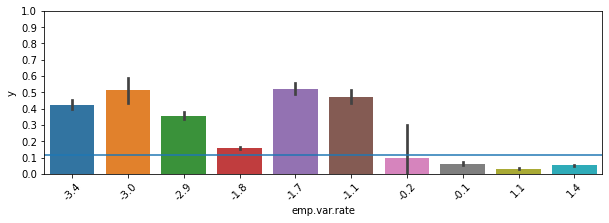

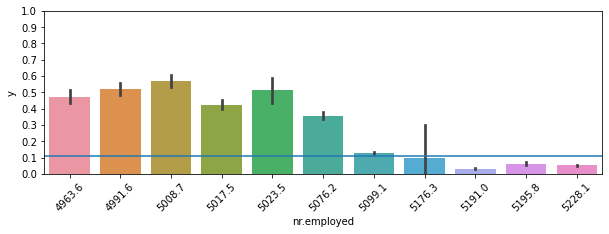

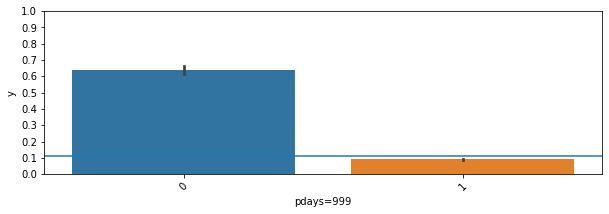

In [60]:
X_char_merged=pd.concat([Y,char],axis=1,join='inner')

for col in (char.columns):
    plt.figure(figsize=(10,3))
    # plotting barplot and horizontal line
    sns.barplot(x=col, y="y",data=X_char_merged, estimator=mean).axhline(X_char_merged['y'].mean())
    plt.xticks(rotation=45)
    plt.yticks(np.arange(0,1.1,0.1))
plt.show()

In [61]:
char_dropped=char.drop(['housing','marital','loan','education','day_of_week'],axis=1)

In [62]:
char_dropped.head(3)

,job,default,contact,month,poutcome,previous,emp.var.rate,nr.employed,pdays=999
0,housemaid,no,telephone,may,nonexistent,0,1.1,5191.0,1
1,services,unknown,telephone,may,nonexistent,0,1.1,5191.0,1
2,services,no,telephone,may,nonexistent,0,1.1,5191.0,1


In [63]:
char_dropped.dtypes

job              object
default          object
contact          object
month            object
poutcome         object
previous          int64
emp.var.rate    float64
nr.employed     float64
pdays=999         int64
dtype: object

In [64]:
char_dropped = char_dropped.applymap(str) # converting to string before get_dummies
char_dropped.dtypes

job             object
default         object
contact         object
month           object
poutcome        object
previous        object
emp.var.rate    object
nr.employed     object
pdays=999       object
dtype: object

In [65]:
# Create dummy features with n-1 levels
df_char_dum = pd.get_dummies(char_dropped, drop_first = True)
df_char_dum.shape

(41188, 52)

In [66]:
df_char_dum.dtypes

job_blue-collar         uint8
job_entrepreneur        uint8
job_housemaid           uint8
job_management          uint8
job_retired             uint8
job_self-employed       uint8
job_services            uint8
job_student             uint8
job_technician          uint8
job_unemployed          uint8
job_unknown             uint8
default_unknown         uint8
default_yes             uint8
contact_telephone       uint8
month_aug               uint8
month_dec               uint8
month_jul               uint8
month_jun               uint8
month_mar               uint8
month_may               uint8
month_nov               uint8
month_oct               uint8
month_sep               uint8
poutcome_nonexistent    uint8
poutcome_success        uint8
previous_1              uint8
previous_2              uint8
previous_3              uint8
previous_4              uint8
previous_5              uint8
previous_6              uint8
previous_7              uint8
emp.var.rate_-0.2       uint8
emp.var.ra

## Part 2 - Select K Best

In [67]:
# Select K Best for Categorical Features

selector = SelectKBest(chi2, k=25) # choosing 25 top features initially

In [68]:
selector.fit_transform(df_char_dum, Y)

# Get columns to keep and create new dataframe with those only
cols = selector.get_support(indices=True)
select_features_df_char = df_char_dum.iloc[:,cols]

# Creating the Data Set for Model Development

In [69]:
data_all = pd.concat([select_features_df_char,select_features_df_num,Y],axis=1,join="inner") 

X_all = data_all.loc[:,data_all.columns!='y']
X_all.dtypes  # entire features used for model development

job_retired             uint8
job_student             uint8
default_unknown         uint8
contact_telephone       uint8
month_mar               uint8
month_may               uint8
month_oct               uint8
month_sep               uint8
poutcome_success        uint8
previous_1              uint8
previous_2              uint8
previous_3              uint8
emp.var.rate_-1.1       uint8
emp.var.rate_-1.7       uint8
emp.var.rate_-2.9       uint8
emp.var.rate_-3.4       uint8
emp.var.rate_1.1        uint8
emp.var.rate_1.4        uint8
nr.employed_4991.6      uint8
nr.employed_5008.7      uint8
nr.employed_5017.5      uint8
nr.employed_5023.5      uint8
nr.employed_5076.2      uint8
nr.employed_5191.0      uint8
nr.employed_5228.1      uint8
age                   float64
cons.price.idx        float64
cons.conf.idx         float64
euribor3m             float64
dtype: object

# Train Test Split

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X_all, data_all.y, stratify=data_all.y, test_size=0.3, 
                                                   random_state=10) 

In [71]:
X_test

,job_retired,job_student,default_unknown,contact_telephone,month_mar,month_may,month_oct,month_sep,poutcome_success,previous_1,previous_2,previous_3,emp.var.rate_-1.1,emp.var.rate_-1.7,emp.var.rate_-2.9,emp.var.rate_-3.4,emp.var.rate_1.1,emp.var.rate_1.4,nr.employed_4991.6,nr.employed_5008.7,nr.employed_5017.5,nr.employed_5023.5,nr.employed_5076.2,nr.employed_5191.0,nr.employed_5228.1,age,cons.price.idx,cons.conf.idx,euribor3m
28617,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54.0,93.075,-47.1,1.415
18710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,36.0,93.918,-42.7,4.968
19866,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,35.0,93.444,-36.1,4.966
35440,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57.0,92.893,-46.2,1.244
12474,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,40.0,93.918,-42.7,4.960
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29901,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,38.0,93.075,-47.1,1.405
32031,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,35.0,92.893,-46.2,1.327
21632,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,31.0,93.444,-36.1,4.963
8586,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,45.0,94.465,-41.8,4.864


In [72]:
print("Shape of Training Data",X_train.shape)
print("Shape of Testing Data",X_test.shape)

Shape of Training Data (28831, 29)
Shape of Testing Data (12357, 29)


In [73]:
print("Response Rate in Training Data", round(y_train.mean(),3))
print("Response Rate in Testing Data", round(y_test.mean(),3))

Response Rate in Training Data 0.113
Response Rate in Testing Data 0.113


# Model Building

In [74]:
logreg = LogisticRegression(random_state=0, solver="liblinear")
logreg.fit(X_train,y_train)

coeff_df = pd.DataFrame(X_train.columns)
coeff_df.columns = ['features']
coeff_df["Coefficient Estimate"] = logreg.coef_[0]
coeff_df.sort_values(by='Coefficient Estimate', ascending=False)

,features,Coefficient Estimate
8,poutcome_success,1.713575
21,nr.employed_5023.5,1.634629
19,nr.employed_5008.7,1.534340
4,month_mar,0.820445
13,emp.var.rate_-1.7,0.685148
18,nr.employed_4991.6,0.685148
20,nr.employed_5017.5,0.661100
15,emp.var.rate_-3.4,0.661100
12,emp.var.rate_-1.1,0.645075
14,emp.var.rate_-2.9,0.525766


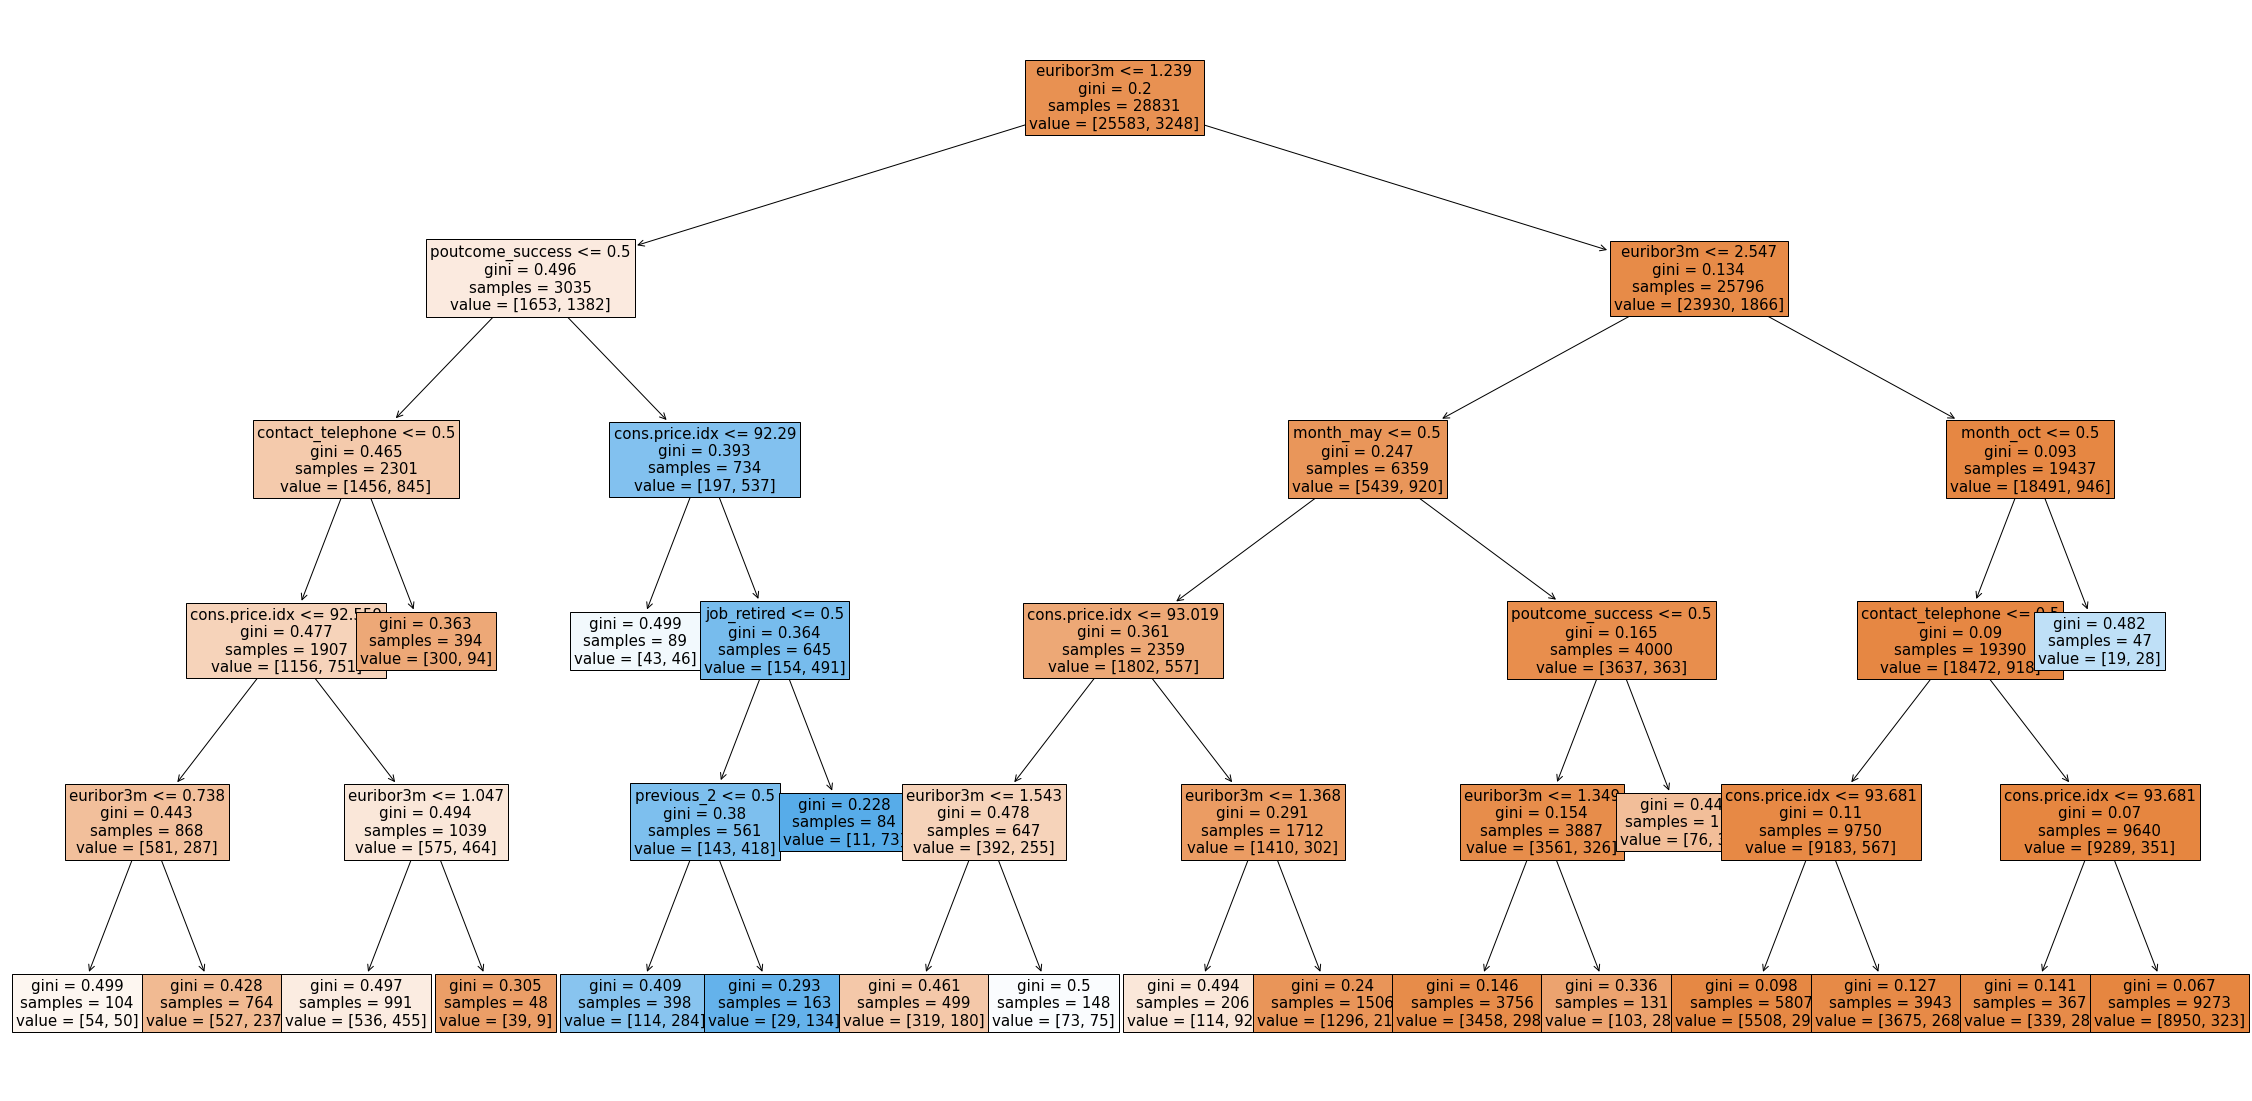

In [75]:
# Building a Decision Tree Model
dtree = DecisionTreeClassifier(criterion='gini',random_state=0, max_depth=5, min_samples_split=500)
dtree.fit(X_train,y_train)

plt.figure(figsize = [40,20])
tree.plot_tree(dtree, fontsize=15,filled=True,feature_names=X_all.columns)
plt.show()

In [76]:
# Building a Random Forest Model
rf = RandomForestClassifier(criterion='gini', random_state=0, max_depth=6, min_samples_split=200) # by default, n_estimators (number of trees) = 100
rf.fit(X_train,y_train)
feature_importances = pd.DataFrame(rf.feature_importances_, index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
euribor3m,0.342234
poutcome_success,0.173784
cons.conf.idx,0.100173
cons.price.idx,0.092215
nr.employed_5008.7,0.037397
emp.var.rate_-1.7,0.028368
nr.employed_4991.6,0.028210
emp.var.rate_-2.9,0.028036
age,0.024612
nr.employed_5017.5,0.019251


In [77]:
# Building a Gradient Boosting Model
# max_depth - maximum depth for the individual tree
gbm = GradientBoostingClassifier(random_state=0, max_depth=6, min_samples_split=500)
gbm.fit(X_train,y_train)

feature_importances = pd.DataFrame(gbm.feature_importances_, index=X_train.columns,
                                 columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
euribor3m,0.688526
poutcome_success,0.107756
age,0.046534
month_may,0.038776
cons.price.idx,0.037358
month_oct,0.019471
contact_telephone,0.016463
cons.conf.idx,0.011586
previous_1,0.007580
default_unknown,0.004439


# Model Evaluation

In [78]:
y_pred_logreg = logreg.predict(X_test)
y_pred_tree = dtree.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_gbm = gbm.predict(X_test)

In [79]:
y_pred_logreg # classes, not probablities are returned

array([0, 0, 0, ..., 0, 0, 0])

In [80]:
# Recall - out of all the positive cases, how many my model was able to capture

In [81]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_logreg))
print("Precision", metrics.precision_score(y_test,y_pred_logreg)) # (601/601+307)
print("Recall", metrics.recall_score(y_test,y_pred_logreg)) # (601/601+791)
print("f1_score", metrics.f1_score(y_test,y_pred_logreg))

Accuracy: 0.898761835396941
Precision 0.6666666666666666
Recall 0.2025862068965517
f1_score 0.3107438016528925


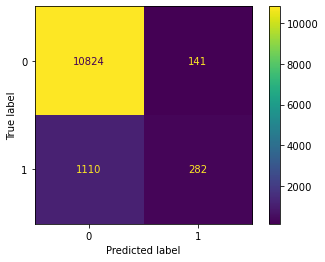

In [82]:
metrics.plot_confusion_matrix(logreg,X_test, y_test)

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test,y_pred_tree))
print("Recall",metrics.recall_score(y_test,y_pred_tree))
print("f1_score",metrics.f1_score(y_test,y_pred_tree))

Accuracy: 0.897952577486445
Precision 0.6641604010025063
Recall 0.1903735632183908
f1_score 0.29592406476828587


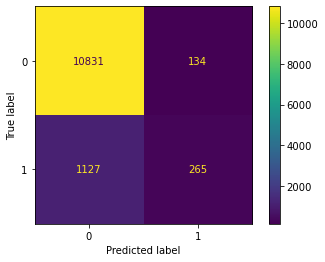

In [84]:
metrics.plot_confusion_matrix(dtree,X_test,y_test)

In [85]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision",metrics.precision_score(y_test,y_pred_rf))
print("Recall",metrics.recall_score(y_test,y_pred_rf)) # poor recall for RF
print("f1_score",metrics.f1_score(y_test,y_pred_rf))

Accuracy: 0.8981144290685441
Precision 0.7071651090342679
Recall 0.16307471264367815
f1_score 0.26503210741389377


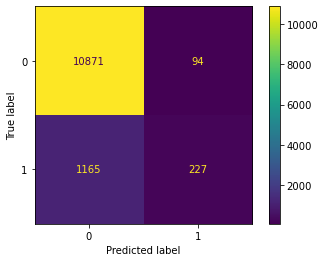

In [86]:
metrics.plot_confusion_matrix(rf,X_test,y_test)

# RF does a better job capturing more True Negatives, but comparitively poor in capturing True Positives

In [87]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_gbm))
print("Precision",metrics.precision_score(y_test,y_pred_gbm))
print("Recall",metrics.recall_score(y_test,y_pred_gbm))
print("f1_score",metrics.f1_score(y_test,y_pred_gbm))

Accuracy: 0.8993283159342883
Precision 0.6365313653136532
Recall 0.2478448275862069
f1_score 0.35677352637021714


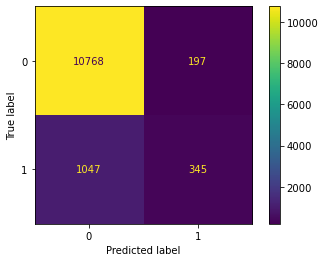

In [88]:
metrics.plot_confusion_matrix(gbm,X_test,y_test)

# Model Comparison

In [89]:
model_predictions_list = [y_pred_logreg, y_pred_tree, y_pred_rf, y_pred_gbm]  # predicted class labels from each model.

pd.DataFrame(
             columns = ['Accuracy', 'Precision', 'Recall', 'f1_score'], 
             index = pd.Series(['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting Model'], name='Classifier'),
             data = [ 
                 [round(metrics.accuracy_score(y_test, i),4) for i in model_predictions_list],
                 [round(metrics.precision_score(y_test,i),4) for i in model_predictions_list],
                 [round(metrics.recall_score(y_test,i),4) for i in model_predictions_list],
                 [ round(metrics.f1_score(y_test,i),4) for i in model_predictions_list] 
                    ] 
            )

,Accuracy,Precision,Recall,f1_score
Classifier,,,,
Logistic Regression,0.8988,0.8980,0.8981,0.8993
Decision Tree,0.6667,0.6642,0.7072,0.6365
Random Forest,0.2026,0.1904,0.1631,0.2478
Gradient Boosting Model,0.3107,0.2959,0.2650,0.3568


In [90]:
# GBM has performed comparitively better, esp in terms of recall.

# Gains Chart Analysis

In [91]:
# This will help to understand the power of discrimination offered by the model's estimated probabilities
# For this study, the whole data set is used instead of X_test, 
# as X_test is shuffled and columns of X_test doesnt reflect the actual dataset

## Logistic Regression - Gains Chart

In [92]:
logreg.predict_proba(X_test)[:,1] # probability of y=1 for each observation

array([0.17916244, 0.07048078, 0.04230367, ..., 0.05661504, 0.04471716,
       0.03020402])

In [93]:
df_test = pd.concat([X_test,y_test],axis=1,join="inner")

df_test['pred_prob_logreg'] = logreg.predict_proba(X_test)[:, 1]

# splitting pred_prob_logreg values into 10 quantiles
df_test['Pred_Prob_Rank_logreg'] = pd.qcut(df_test['pred_prob_logreg'],10, labels=range(1,11)) 

df_test.head(3)

,job_retired,job_student,default_unknown,contact_telephone,month_mar,month_may,month_oct,month_sep,poutcome_success,previous_1,previous_2,previous_3,emp.var.rate_-1.1,emp.var.rate_-1.7,emp.var.rate_-2.9,emp.var.rate_-3.4,emp.var.rate_1.1,emp.var.rate_1.4,nr.employed_4991.6,nr.employed_5008.7,nr.employed_5017.5,nr.employed_5023.5,nr.employed_5076.2,nr.employed_5191.0,nr.employed_5228.1,age,cons.price.idx,cons.conf.idx,euribor3m,y,pred_prob_logreg,Pred_Prob_Rank_logreg
28617,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54.0,93.075,-47.1,1.415,0,0.179162,9
18710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,36.0,93.918,-42.7,4.968,0,0.070481,6
19866,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,35.0,93.444,-36.1,4.966,0,0.042304,3


In [94]:
# Actual event rate
rank_df_actuals_logreg = pd.DataFrame(df_test.groupby('Pred_Prob_Rank_logreg')['y'].agg(['count','mean'])
                               .sort_values(by='Pred_Prob_Rank_logreg',ascending=False))
rank_df_actuals_logreg.rename(columns={'mean':'Actual_event_rate'},inplace=True)
rank_df_actuals_logreg

,count,Actual_event_rate
Pred_Prob_Rank_logreg,,
10,1236,0.494337
9,1236,0.211165
8,1228,0.086319
7,1243,0.057924
6,1234,0.065640
5,1233,0.059205
4,1239,0.043584
3,1234,0.041329
2,1238,0.033118


In [95]:
# predicted probability by logistic regression
rank_df_predicted_logreg = df_test.groupby('Pred_Prob_Rank_logreg')['pred_prob_logreg'].agg(['count','min','mean','max']).sort_values(
    by='Pred_Prob_Rank_logreg',ascending=False)
rank_df_predicted_logreg.rename(columns={'min':'Min(Predicted_event_rates)',
    'mean':'Mean(Predicted_event_rates)', 'max':'Max(Predicted_event_rate)'},inplace=True)
rank_df_predicted_logreg

,count,Min(Predicted_event_rates),Mean(Predicted_event_rates),Max(Predicted_event_rate)
Pred_Prob_Rank_logreg,,,,
10,1236,0.305218,0.487105,0.927833
9,1236,0.110723,0.194598,0.305087
8,1228,0.079382,0.098892,0.110722
7,1243,0.071165,0.074235,0.079355
6,1234,0.056939,0.067220,0.071148
5,1233,0.052510,0.054956,0.056854
4,1239,0.045303,0.048843,0.052495
3,1234,0.034234,0.040714,0.045290
2,1238,0.032102,0.033143,0.034224


In [96]:
logreg_reality_df = pd.concat([rank_df_actuals_logreg,rank_df_predicted_logreg.loc[:,"Mean(Predicted_event_rates)"]],axis=1,join="inner")
logreg_reality_df

,count,Actual_event_rate,Mean(Predicted_event_rates)
Pred_Prob_Rank_logreg,,,
10,1236,0.494337,0.487105
9,1236,0.211165,0.194598
8,1228,0.086319,0.098892
7,1243,0.057924,0.074235
6,1234,0.065640,0.067220
5,1233,0.059205,0.054956
4,1239,0.043584,0.048843
3,1234,0.041329,0.040714
2,1238,0.033118,0.033143


In [97]:
logreg_reality_df['N_events']= (logreg_reality_df['count']*logreg_reality_df['Actual_event_rate']).astype(int)
logreg_reality_df['cum_events']= logreg_reality_df['N_events'].cumsum()
logreg_reality_df['event_proportion']= logreg_reality_df['N_events']/max(logreg_reality_df['N_events'].cumsum())
logreg_reality_df['cum_event_proportion']= logreg_reality_df['event_proportion'].cumsum()

logreg_reality_df['N_non_events']= logreg_reality_df['count']-logreg_reality_df['N_events']
logreg_reality_df['cum_non_events']= logreg_reality_df['N_non_events'].cumsum()
logreg_reality_df['non_event_proportion']= logreg_reality_df['N_non_events']/max(logreg_reality_df['N_non_events'].cumsum())
logreg_reality_df['cum_non_event_proportion']= logreg_reality_df['non_event_proportion'].cumsum()

logreg_reality_df = logreg_reality_df.reset_index()
logreg_reality_df.index = range(1,11)
logreg_reality_df.index.name = "Decile"
logreg_reality_df

,Pred_Prob_Rank_logreg,count,Actual_event_rate,Mean(Predicted_event_rates),N_events,cum_events,event_proportion,cum_event_proportion,N_non_events,cum_non_events,non_event_proportion,cum_non_event_proportion
Decile,,,,,,,,,,,,
1,10,1236,0.494337,0.487105,611,611,0.439568,0.439568,625,625,0.056989,0.056989
2,9,1236,0.211165,0.194598,261,872,0.187770,0.627338,975,1600,0.088903,0.145892
3,8,1228,0.086319,0.098892,106,978,0.076259,0.703597,1122,2722,0.102307,0.248199
4,7,1243,0.057924,0.074235,72,1050,0.051799,0.755396,1171,3893,0.106775,0.354974
5,6,1234,0.065640,0.067220,80,1130,0.057554,0.812950,1154,5047,0.105225,0.460199
6,5,1233,0.059205,0.054956,73,1203,0.052518,0.865468,1160,6207,0.105772,0.565971
7,4,1239,0.043584,0.048843,53,1256,0.038129,0.903597,1186,7393,0.108143,0.674113
8,3,1234,0.041329,0.040714,51,1307,0.036691,0.940288,1183,8576,0.107869,0.781982
9,2,1238,0.033118,0.033143,41,1348,0.029496,0.969784,1197,9773,0.109146,0.891128


In [98]:
# "Kolmogorov-Smirnov" (KS) statistics to measure the discriminatory power of a model,
# ie; to check the ability of the model to distinguish between events and non-events.  
# Using KS statistics, we can look at the maximum difference between distribution of cumulative events and cumulative non-events.

In [99]:
logreg_reality_df['KS'] = round((logreg_reality_df['cum_event_proportion']-logreg_reality_df['cum_non_event_proportion']),4)
logreg_reality_df

,Pred_Prob_Rank_logreg,count,Actual_event_rate,Mean(Predicted_event_rates),N_events,cum_events,event_proportion,cum_event_proportion,N_non_events,cum_non_events,non_event_proportion,cum_non_event_proportion,KS
Decile,,,,,,,,,,,,,
1,10,1236,0.494337,0.487105,611,611,0.439568,0.439568,625,625,0.056989,0.056989,0.3826
2,9,1236,0.211165,0.194598,261,872,0.187770,0.627338,975,1600,0.088903,0.145892,0.4814
3,8,1228,0.086319,0.098892,106,978,0.076259,0.703597,1122,2722,0.102307,0.248199,0.4554
4,7,1243,0.057924,0.074235,72,1050,0.051799,0.755396,1171,3893,0.106775,0.354974,0.4004
5,6,1234,0.065640,0.067220,80,1130,0.057554,0.812950,1154,5047,0.105225,0.460199,0.3528
6,5,1233,0.059205,0.054956,73,1203,0.052518,0.865468,1160,6207,0.105772,0.565971,0.2995
7,4,1239,0.043584,0.048843,53,1256,0.038129,0.903597,1186,7393,0.108143,0.674113,0.2295
8,3,1234,0.041329,0.040714,51,1307,0.036691,0.940288,1183,8576,0.107869,0.781982,0.1583
9,2,1238,0.033118,0.033143,41,1348,0.029496,0.969784,1197,9773,0.109146,0.891128,0.0787


In [100]:
logreg_reality_df['random_cap'] = logreg_reality_df['count']/max(logreg_reality_df['count'].cumsum())
logreg_reality_df['cum_random_cap'] = logreg_reality_df['random_cap'].cumsum()

logreg_reality_df

,Pred_Prob_Rank_logreg,count,Actual_event_rate,Mean(Predicted_event_rates),N_events,cum_events,event_proportion,cum_event_proportion,N_non_events,cum_non_events,non_event_proportion,cum_non_event_proportion,KS,random_cap,cum_random_cap
Decile,,,,,,,,,,,,,,,
1,10,1236,0.494337,0.487105,611,611,0.439568,0.439568,625,625,0.056989,0.056989,0.3826,0.100024,0.100024
2,9,1236,0.211165,0.194598,261,872,0.187770,0.627338,975,1600,0.088903,0.145892,0.4814,0.100024,0.200049
3,8,1228,0.086319,0.098892,106,978,0.076259,0.703597,1122,2722,0.102307,0.248199,0.4554,0.099377,0.299425
4,7,1243,0.057924,0.074235,72,1050,0.051799,0.755396,1171,3893,0.106775,0.354974,0.4004,0.100591,0.400016
5,6,1234,0.065640,0.067220,80,1130,0.057554,0.812950,1154,5047,0.105225,0.460199,0.3528,0.099862,0.499879
6,5,1233,0.059205,0.054956,73,1203,0.052518,0.865468,1160,6207,0.105772,0.565971,0.2995,0.099782,0.599660
7,4,1239,0.043584,0.048843,53,1256,0.038129,0.903597,1186,7393,0.108143,0.674113,0.2295,0.100267,0.699927
8,3,1234,0.041329,0.040714,51,1307,0.036691,0.940288,1183,8576,0.107869,0.781982,0.1583,0.099862,0.799790
9,2,1238,0.033118,0.033143,41,1348,0.029496,0.969784,1197,9773,0.109146,0.891128,0.0787,0.100186,0.899976


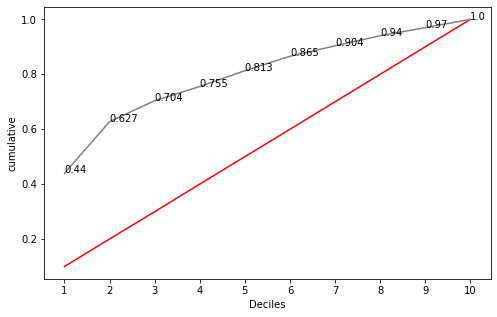

In [101]:
plt.figure(figsize=(8,5))
plt.xticks(range(1,11))
plt.xlabel("Deciles")
plt.ylabel("cumulative")

sns.lineplot( x="Decile", y="cum_random_cap", data = logreg_reality_df, color = 'red')
sns.lineplot( x="Decile", y="cum_event_proportion", data = logreg_reality_df,color='grey')

for x,y in logreg_reality_df.loc[:,["cum_event_proportion"]].reset_index().iterrows():
    plt.text(y[0],y[1],round(y[1],3))

## Decision Tree - Gains Chart

In [102]:
df_test['pred_prob_dtree'] = dtree.predict_proba(X_test)[:, 1]

# splitting pred_prob_dtree values into 10 quantiles
# bin edges are not unique, hence ValueError was raised, so using rank method to avoid that
# rank(method="first") - for group of records that have the same value, ranks are assigned in the order they appear in the array
df_test['Pred_Prob_Rank_dtree'] = pd.qcut(df_test['pred_prob_dtree'].rank(method="first"),10,labels=range(1,11))

# Actual event rate
rank_df_actuals_dtree = df_test.groupby('Pred_Prob_Rank_dtree')['y'].agg(['count','mean']).sort_values(by='Pred_Prob_Rank_dtree'
                                                                                                        ,ascending=False)
rank_df_actuals_dtree.rename(columns={'mean':'Actual_event_rate'},inplace=True)

# predicted probability by Decision Tree
rank_df_predicted_dtree = df_test.groupby('Pred_Prob_Rank_dtree')['pred_prob_dtree'].agg(
    ['count','min','mean','max']).sort_values(by='Pred_Prob_Rank_dtree',ascending=False)
rank_df_predicted_dtree.rename(columns={'min':'Min(Predicted_event_rates)',
    'mean':'Mean(Predicted_event_rates)', 'max':'Max(Predicted_event_rate)'},inplace=True)

dtree_reality_df= pd.concat([rank_df_actuals_dtree,rank_df_predicted_dtree.loc[:,"Mean(Predicted_event_rates)"]],axis=1,join="inner")

dtree_reality_df['N_events']= (dtree_reality_df['count']*dtree_reality_df['Actual_event_rate']).astype(int)
dtree_reality_df['cum_events']= dtree_reality_df['N_events'].cumsum()
dtree_reality_df['event_proportion']= dtree_reality_df['N_events']/max(dtree_reality_df['N_events'].cumsum())
dtree_reality_df['cum_event_proportion']= dtree_reality_df['event_proportion'].cumsum()

dtree_reality_df['N_non_events']= dtree_reality_df['count']-dtree_reality_df['N_events']
dtree_reality_df['cum_non_events']= dtree_reality_df['N_non_events'].cumsum()
dtree_reality_df['non_event_proportion']= dtree_reality_df['N_non_events']/max(dtree_reality_df['N_non_events'].cumsum())
dtree_reality_df['cum_non_event_proportion']= dtree_reality_df['non_event_proportion'].cumsum()

dtree_reality_df = dtree_reality_df.reset_index()
dtree_reality_df.index=range(1,11)
dtree_reality_df.index.name = "Decile"

dtree_reality_df['KS'] = round((dtree_reality_df['cum_event_proportion']-dtree_reality_df['cum_non_event_proportion']),4)

dtree_reality_df['random_cap']=dtree_reality_df['count']/max(dtree_reality_df['count'].cumsum())
dtree_reality_df['cum_random_cap']= dtree_reality_df['random_cap'].cumsum()
dtree_reality_df

,Pred_Prob_Rank_dtree,count,Actual_event_rate,Mean(Predicted_event_rates),N_events,cum_events,event_proportion,cum_event_proportion,N_non_events,cum_non_events,non_event_proportion,cum_non_event_proportion,KS,random_cap,cum_random_cap
Decile,,,,,,,,,,,,,,,
1,10,1236,0.512945,0.508654,634,634,0.455460,0.455460,602,602,0.054902,0.054902,0.4006,0.100024,0.100024
2,9,1236,0.204693,0.196753,253,887,0.181753,0.637213,983,1585,0.089649,0.144551,0.4927,0.100024,0.200049
3,8,1235,0.083401,0.079340,103,990,0.073994,0.711207,1132,2717,0.103238,0.247788,0.4634,0.099943,0.299992
4,7,1236,0.063916,0.072849,79,1069,0.056753,0.767960,1157,3874,0.105518,0.353306,0.4147,0.100024,0.400016
5,6,1235,0.058300,0.066020,72,1141,0.051724,0.819684,1163,5037,0.106065,0.459371,0.3603,0.099943,0.499960
6,5,1236,0.048544,0.051490,60,1201,0.043103,0.862787,1176,6213,0.107250,0.566621,0.2962,0.100024,0.599984
7,4,1236,0.050971,0.049522,63,1264,0.045259,0.908046,1173,7386,0.106977,0.673598,0.2344,0.100024,0.700008
8,3,1235,0.035628,0.034832,44,1308,0.031609,0.939655,1191,8577,0.108618,0.782216,0.1574,0.099943,0.799951
9,2,1236,0.040453,0.034832,50,1358,0.035920,0.975575,1186,9763,0.108162,0.890378,0.0852,0.100024,0.899976


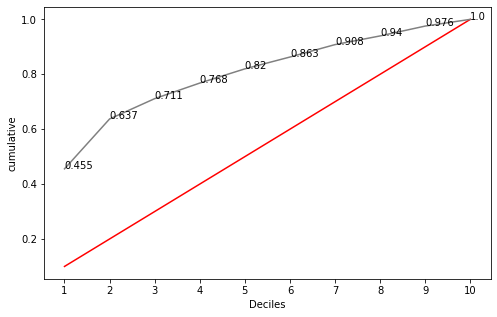

In [103]:
plt.figure(figsize=(8,5))
plt.xticks(range(1,11))
plt.xlabel("Deciles")
plt.ylabel("cumulative")

sns.lineplot( x="Decile", y="cum_random_cap", data=dtree_reality_df,color='red')
sns.lineplot( x="Decile", y="cum_event_proportion", data=dtree_reality_df,color='grey')

for x,y in dtree_reality_df.loc[:,["cum_event_proportion"]].reset_index().iterrows():
     plt.text(y[0],y[1],round(y[1],3))

## Random Forest - Gains Chart

In [104]:
df_test['pred_prob_rf'] = rf.predict_proba(X_test)[:, 1]

# splitting pred_prob_dtree values into 10 quantiles
df_test['Pred_Prob_Rank_rf']=pd.qcut(df_test['pred_prob_rf'].rank(method="first"),10,labels=range(1,11))

# Actual event rate
rank_df_actuals_rf = df_test.groupby('Pred_Prob_Rank_rf')['y'].agg(['count','mean']).sort_values(by='Pred_Prob_Rank_rf',ascending=False)
rank_df_actuals_rf.rename(columns={'mean':'Actual_event_rate'},inplace=True)

# predicted probability by Random Forest
rank_df_predicted_rf = df_test.groupby('Pred_Prob_Rank_rf')['pred_prob_rf'].agg(
    ['count','min','mean','max']).sort_values(by='Pred_Prob_Rank_rf', ascending=False)
rank_df_predicted_rf.rename(columns={'min':'Min(Predicted_event_rates)',
    'mean':'Mean(Predicted_event_rates)', 'max':'Max(Predicted_event_rate)'},inplace=True)

rf_reality_df= pd.concat([rank_df_actuals_rf,rank_df_predicted_rf.loc[:,"Mean(Predicted_event_rates)"]],axis=1,join="inner")

rf_reality_df['N_events']= (rf_reality_df['count']*rf_reality_df['Actual_event_rate']).astype(int)
rf_reality_df['cum_events']= rf_reality_df['N_events'].cumsum()
rf_reality_df['event_proportion']= rf_reality_df['N_events']/max(rf_reality_df['N_events'].cumsum())
rf_reality_df['cum_event_proportion']= rf_reality_df['event_proportion'].cumsum()

rf_reality_df['N_non_events']= rf_reality_df['count']-rf_reality_df['N_events']
rf_reality_df['cum_non_events']= rf_reality_df['N_non_events'].cumsum()
rf_reality_df['non_event_proportion']= rf_reality_df['N_non_events']/max(rf_reality_df['N_non_events'].cumsum())
rf_reality_df['cum_non_event_proportion']= rf_reality_df['non_event_proportion'].cumsum()

rf_reality_df = rf_reality_df.reset_index()
rf_reality_df.index=range(1,11)
rf_reality_df.index.name = "Decile"

rf_reality_df['KS'] = round((rf_reality_df['cum_event_proportion']-rf_reality_df['cum_non_event_proportion']),4)

rf_reality_df['random_cap']= rf_reality_df['count']/max(rf_reality_df['count'].cumsum())
rf_reality_df['cum_random_cap']= rf_reality_df['random_cap'].cumsum()
rf_reality_df

,Pred_Prob_Rank_rf,count,Actual_event_rate,Mean(Predicted_event_rates),N_events,cum_events,event_proportion,cum_event_proportion,N_non_events,cum_non_events,non_event_proportion,cum_non_event_proportion,KS,random_cap,cum_random_cap
Decile,,,,,,,,,,,,,,,
1,10,1236,0.475728,0.456259,588,588,0.422717,0.422717,648,648,0.059092,0.059092,0.3636,0.100024,0.100024
2,9,1236,0.235437,0.176355,291,879,0.209202,0.631919,945,1593,0.086175,0.145267,0.4867,0.100024,0.200049
3,8,1235,0.094737,0.090260,117,996,0.084112,0.716032,1118,2711,0.101951,0.247219,0.4688,0.099943,0.299992
4,7,1236,0.046117,0.072382,57,1053,0.040978,0.757009,1179,3890,0.107514,0.354733,0.4023,0.100024,0.400016
5,6,1235,0.065587,0.063432,81,1134,0.058231,0.815241,1154,5044,0.105234,0.459967,0.3553,0.099943,0.499960
6,5,1236,0.056634,0.061348,70,1204,0.050324,0.865564,1166,6210,0.106329,0.566296,0.2993,0.100024,0.599984
7,4,1236,0.047735,0.059484,59,1263,0.042416,0.907980,1177,7387,0.107332,0.673628,0.2344,0.100024,0.700008
8,3,1235,0.038057,0.054630,47,1310,0.033789,0.941769,1188,8575,0.108335,0.781962,0.1598,0.099943,0.799951
9,2,1236,0.038835,0.045565,47,1357,0.033789,0.975557,1189,9764,0.108426,0.890388,0.0852,0.100024,0.899976


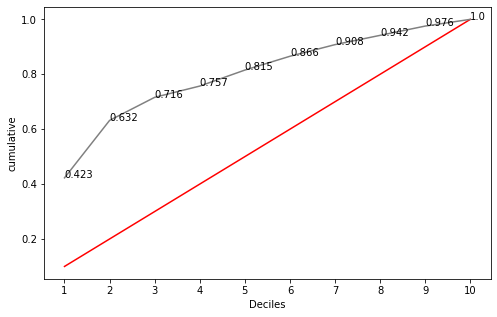

In [105]:
plt.figure(figsize=(8,5))
plt.xticks(range(1,11))
plt.xlabel("Deciles")
plt.ylabel("cumulative")

sns.lineplot( x="Decile", y="cum_random_cap", data=rf_reality_df,color='red')
sns.lineplot( x="Decile", y="cum_event_proportion", data=rf_reality_df,color='grey')

for x,y in rf_reality_df.loc[:,["cum_event_proportion"]].reset_index().iterrows():
     plt.text(y[0],y[1],round(y[1],3))

## Gradient Boosting Model - Gains Chart

In [106]:
df_test['pred_prob_gbm'] = gbm.predict_proba(X_test)[:, 1]

# splitting pred_prob_dtree values into 10 quantiles
df_test['Pred_Prob_Rank_gbm'] = pd.qcut(df_test['pred_prob_gbm'].rank(method="first"),10,labels=range(1,11))

# Actual event rate
rank_df_actuals_gbm = df_test.groupby('Pred_Prob_Rank_gbm')['y'].agg(['count','mean']).sort_values(by='Pred_Prob_Rank_gbm',ascending=False)
rank_df_actuals_gbm.rename(columns={'mean':'Actual_event_rate'},inplace=True)

# predicted probability by Gradient Boosting Model
rank_df_predicted_gbm = df_test.groupby('Pred_Prob_Rank_gbm')['pred_prob_gbm'].agg(['count','min','mean','max']).sort_values(by='Pred_Prob_Rank_gbm',
                                                                                                                        ascending=False)
rank_df_predicted_gbm.rename(columns={'min':'Min(Predicted_event_rates)',
    'mean':'Mean(Predicted_event_rates)', 'max':'Max(Predicted_event_rate)'},inplace=True)

gbm_reality_df= pd.concat([rank_df_actuals_gbm,rank_df_predicted_gbm.loc[:,"Mean(Predicted_event_rates)"]],axis=1,join="inner")

gbm_reality_df['N_events']= (gbm_reality_df['count']*gbm_reality_df['Actual_event_rate']).astype(int)
gbm_reality_df['cum_events']= gbm_reality_df['N_events'].cumsum()
gbm_reality_df['event_proportion']= gbm_reality_df['N_events']/max(gbm_reality_df['N_events'].cumsum())
gbm_reality_df['cum_event_proportion']= gbm_reality_df['event_proportion'].cumsum()

gbm_reality_df['N_non_events']= gbm_reality_df['count']-gbm_reality_df['N_events']
gbm_reality_df['cum_non_events']= gbm_reality_df['N_non_events'].cumsum()
gbm_reality_df['non_event_proportion']= gbm_reality_df['N_non_events']/max(gbm_reality_df['N_non_events'].cumsum())
gbm_reality_df['cum_non_event_proportion']= gbm_reality_df['non_event_proportion'].cumsum()

gbm_reality_df = gbm_reality_df.reset_index()
gbm_reality_df.index=range(1,11)
gbm_reality_df.index.name = "Decile"

gbm_reality_df['KS'] = round((gbm_reality_df['cum_event_proportion']-gbm_reality_df['cum_non_event_proportion']),4)

gbm_reality_df['random_cap']= gbm_reality_df['count']/max(gbm_reality_df['count'].cumsum())
gbm_reality_df['cum_random_cap']= gbm_reality_df['random_cap'].cumsum()
gbm_reality_df

,Pred_Prob_Rank_gbm,count,Actual_event_rate,Mean(Predicted_event_rates),N_events,cum_events,event_proportion,cum_event_proportion,N_non_events,cum_non_events,non_event_proportion,cum_non_event_proportion,KS,random_cap,cum_random_cap
Decile,,,,,,,,,,,,,,,
1,10,1236,0.513754,0.520126,635,635,0.456178,0.456178,601,601,0.054811,0.054811,0.4014,0.100024,0.100024
2,9,1236,0.220874,0.193128,273,908,0.196121,0.652299,963,1564,0.087825,0.142636,0.5097,0.100024,0.200049
3,8,1235,0.081781,0.085867,101,1009,0.072557,0.724856,1134,2698,0.103420,0.246056,0.4788,0.099943,0.299992
4,7,1236,0.068770,0.070605,85,1094,0.061063,0.785920,1151,3849,0.104970,0.351026,0.4349,0.100024,0.400016
5,6,1235,0.048583,0.058458,60,1154,0.043103,0.829023,1175,5024,0.107159,0.458185,0.3708,0.099943,0.499960
6,5,1236,0.045307,0.050383,56,1210,0.040230,0.869253,1180,6204,0.107615,0.565800,0.3035,0.100024,0.599984
7,4,1236,0.046117,0.045454,57,1267,0.040948,0.910201,1179,7383,0.107524,0.673324,0.2369,0.100024,0.700008
8,3,1235,0.030769,0.040089,38,1305,0.027299,0.937500,1197,8580,0.109166,0.782490,0.1550,0.099943,0.799951
9,2,1236,0.043689,0.034444,54,1359,0.038793,0.976293,1182,9762,0.107798,0.890287,0.0860,0.100024,0.899976


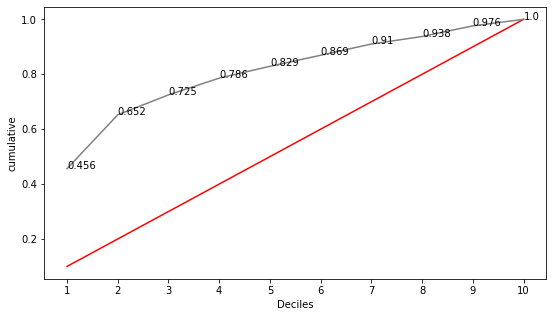

In [107]:
plt.figure(figsize=(9,5))
plt.xticks(range(1,11))
plt.xlabel("Deciles")
plt.ylabel("cumulative")

sns.lineplot( x="Decile", y="cum_random_cap", data=gbm_reality_df,color='red')
sns.lineplot( x="Decile", y="cum_event_proportion", data=gbm_reality_df,color='grey')

for x,y in gbm_reality_df.loc[:,["cum_event_proportion"]].reset_index().iterrows():
     plt.text(y[0],y[1],round(y[1],3))

# Project Conclusion 

In [108]:
# The GBM Model has performed comparitively better as accuracy, recall and f1 score are highest for GBM.
# KS is highest by second decile for GBM

In [109]:
# as KS statistic is highest by 2nd decile, Top 2 deciles can be targetted first for the campaign.
df_test['Pred_Response_Segment_GBM'] = np.where(df_test['Pred_Prob_Rank_gbm']>8,"Top 2","Bottom 8")
df_test.head(4)

,job_retired,job_student,default_unknown,contact_telephone,month_mar,month_may,month_oct,month_sep,poutcome_success,previous_1,previous_2,previous_3,emp.var.rate_-1.1,emp.var.rate_-1.7,emp.var.rate_-2.9,emp.var.rate_-3.4,emp.var.rate_1.1,emp.var.rate_1.4,nr.employed_4991.6,nr.employed_5008.7,nr.employed_5017.5,nr.employed_5023.5,nr.employed_5076.2,nr.employed_5191.0,nr.employed_5228.1,age,cons.price.idx,cons.conf.idx,euribor3m,y,pred_prob_logreg,Pred_Prob_Rank_logreg,pred_prob_dtree,Pred_Prob_Rank_dtree,pred_prob_rf,Pred_Prob_Rank_rf,pred_prob_gbm,Pred_Prob_Rank_gbm,Pred_Response_Segment_GBM
28617,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54.0,93.075,-47.1,1.415,0,0.179162,9,0.139442,9,0.122147,9,0.162035,9,Top 2
18710,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,36.0,93.918,-42.7,4.968,0,0.070481,6,0.067969,6,0.061736,5,0.049942,5,Bottom 8
19866,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,35.0,93.444,-36.1,4.966,0,0.042304,3,0.051490,4,0.060486,4,0.075409,8,Bottom 8
35440,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,57.0,92.893,-46.2,1.244,1,0.100080,8,0.079340,7,0.090888,8,0.103510,8,Bottom 8


In [110]:
df_test.groupby('Pred_Response_Segment_GBM')['y'].agg(['mean','count'])  # actual event rates

# we could capture 2472 (out of 12357) records with higher chance of taking a term deposit.

,mean,count
Pred_Response_Segment_GBM,,
Bottom 8,0.048963,9885
Top 2,0.367314,2472


## Fine tuning the results to find the right recommendations

In [111]:
df_test.groupby('poutcome_success')['y'].agg(['mean','count'])  # event rates based on previous marketing campaigns' outcome

# for observations with poutcome="success" has an event rate of ~65% (much higher than the actual event rate ~11%)

,mean,count
poutcome_success,,
0,0.094098,11945
1,0.650485,412


In [112]:
# splitting the records based on Age feature
# Duration was the most important feature by Random Forest and GBM algortihm, second most important by Decision Tree
df_test['Age_Rank'] = pd.qcut(df_test['age'],4,labels=range(1,5)) 
df_test.groupby('Age_Rank')['age'].agg(['min','mean','max'])

,min,mean,max
Age_Rank,,,
1,23.0,28.853805,32.0
2,33.0,35.318197,38.0
3,39.0,42.681445,47.0
4,48.0,54.441664,71.0


In [113]:
df_test['age'].median()

38.0

In [114]:
df_test['age_segment'] = np.where(df_test['Age_Rank']>=3, "Higher Age", "Lower Age")

df1 = pd.crosstab(df_test['age_segment'], [df_test['Pred_Response_Segment_GBM'],df_test['poutcome_success']], values=df_test['y'], 
                               aggfunc='mean').fillna(0)
df2 = pd.crosstab(df_test['age_segment'], [df_test['Pred_Response_Segment_GBM'],df_test['poutcome_success']],values= df_test['y'], 
                               aggfunc='count').fillna(0).astype(int)

styles = [dict(selector="caption", props=[("font-size", "110%"), ("font-weight", "bold")])]
df1_styler = df1.style.set_table_attributes("style='display:inline'").set_caption('Actual Event Rate').set_table_styles(styles)
df2_styler = df2.style.set_table_attributes("style='display:inline'").set_caption('Count of Records').set_table_styles(styles)

space="\xa0" * 10 # to introduce some space between tables
display_html(df1_styler._repr_html_() + space + df2_styler._repr_html_(), raw=True)

Actual Event Rate 
 
 
 Pred_Response_Segment_GBM 
 Bottom 8 
 Top 2 
 
 
 poutcome_success 
 0 
 1 
 0 
 1 
 
 
 age_segment 
   
   
   
   
 
 
 
 
 Higher Age 
 0.046019 
 0.200000 
 0.334831 
 0.704082 
 
 
 Lower Age 
 0.051721 
 0.000000 
 0.291915 
 0.611374 
 
 
 
          
 
 Count of Records 
 
 
 Pred_Response_Segment_GBM 
 Bottom 8 
 Top 2 
 
 
 poutcome_success 
 0 
 1 
 0 
 1 
 
 
 age_segment 
   
   
   
   
 
 
 
 
 Higher Age 
 4911 
 5 
 890 
 196 
 
 
 Lower Age 
 4969 
 0 
 1175 
 211

In [115]:
############## Recommendations ##################

# Phase 1 - Speak to 196 customers who falls in 'Top 2, Higher Age, poutcome=success' segment - their event rate is 70%.
# Phase 2 - 'Top 2, Lower Age, poutcome=success' segment - their event rate is 61%.
# Phase 3 - Rest of the customers in Top 2 segment - their event rate is ~30% (still much higher than population event rate, ie 11%).
#          'Bottom 8, poutcome=success' segment also be included in this phase, as their count is minimal.

# If the customer executive team has bandwidth beyond 3 phases, another approach can be taken, ie:
# from the 'Bottom 8', next 2 deciles of customers can be chosen.

# In case of a real project, as count of customers gets much higher, if the customer executive team has very limited bandwidth, 
# instead of splitting into 10 Deciles based on Predicted Probability, split into even finer groups, (say 20) and 
# prioritize records in the initial few groups, based on bandwidth.

In [116]:
# Entire data response rate - ~11%
# Prioritized customer list response rate - 70%, 61% and ~30%
# Hence, expectation from the model is met.